In [6]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from mlxtend.plotting import plot_decision_regions


In [7]:
ds=pd.read_csv('../socialNetworkAds.csv')
ds.head(3)


,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0


In [8]:
ds.drop(columns=['User ID','Gender'],inplace=True)
ds.head(3)

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0


In [9]:
x=ds.iloc[:,:-1]
y=ds['Purchased']


In [10]:
from sklearn.preprocessing import PolynomialFeatures
pf=PolynomialFeatures(degree=2)
pf.fit(x)
pf.transform(x)
x=pd.DataFrame(pf.transform(x))


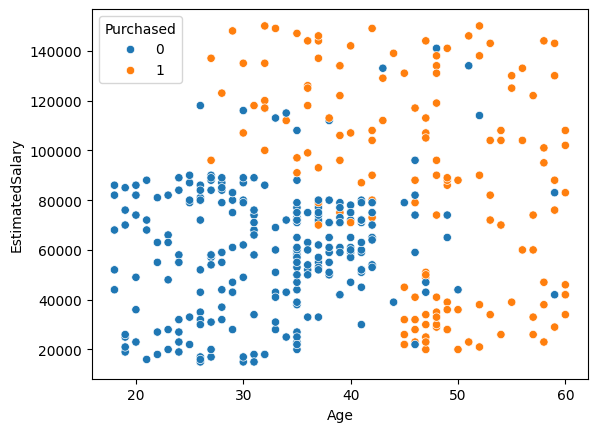

In [11]:
sns.scatterplot(x='Age',y='EstimatedSalary',data=ds,hue='Purchased')
plt.show()

In [12]:
x_train,x_test,y_train,y_test= train_test_split(x,y,train_size=0.2,random_state=42)

In [13]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(x_train,y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [14]:
lr.score(x_test,y_test)*100

82.1875

ValueError: Filler values must be provided when X has more than 2 training features.

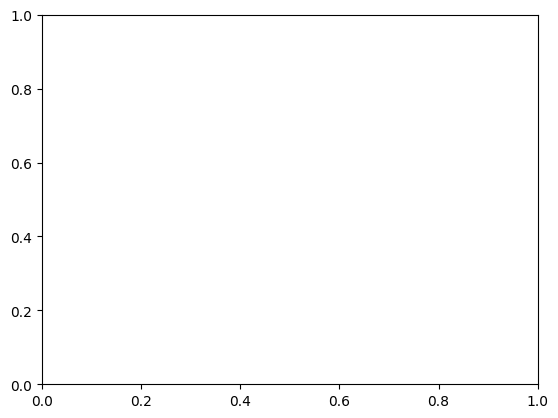

In [15]:

plot_decision_regions(x.to_numpy(),y.to_numpy(),clf=lr)
plt.show()
x.ndim